In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
          'marital-status', 'occupation', 'relationship', 'race', 'sex', 
          'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'target']

In [3]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                 index_col=False, names=columns)

### 1. How many males and females are there?

In [4]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

### 2. What is the mean male age?

In [5]:
df['age'][df['sex'] == ' Male'].mean()

39.43354749885268

### 3. What is the proportion of the US citizens?

In [6]:
df['native-country'][df['native-country'] == ' United-States'].count() / df.shape[0]

0.895857006848684

### 4. Plot the distribution of people’s education as a bar plot.

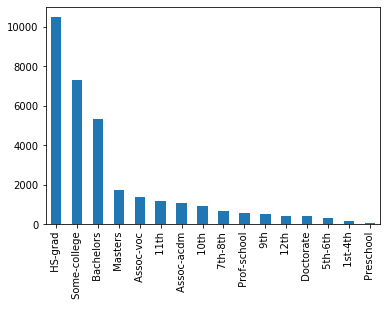

In [7]:
df.education.value_counts().plot(kind='bar')

### 5. What is the mean and standard deviation of the ”final weight” for divorced people?

In [8]:
df.fnlwgt[df['marital-status'] == ' Divorced'].agg(['mean', 'std'])

mean    185802.790457
std     105646.789459
Name: fnlwgt, dtype: float64

### 6. Is it true that the people who receive over 50k are mostly highly educated?

In [9]:
ed_diff = []
ed = df['education-num'].unique()
ed.sort()
for idx in ed:
    ed_diff.append(df.target[(df['target'] == ' >50K') & (df['education-num'] == idx)].count() / df.target[
        df['education-num'] == idx].count())
if np.diff(np.array(ed_diff)).sum() > 0:
    print('Yes')
else:
    print('No')

Yes


### 7. What is the maximum male and female age for each race?

In [10]:
df.groupby(['race', 'sex']).age.max()

race                 sex    
 Amer-Indian-Eskimo   Female    80
                      Male      82
 Asian-Pac-Islander   Female    75
                      Male      90
 Black                Female    90
                      Male      90
 Other                Female    74
                      Male      77
 White                Female    90
                      Male      90
Name: age, dtype: int64

### 8. The people from which countries work as farmers/fishers?

In [11]:
df['native-country'][df['occupation'] == ' Farming-fishing'].unique()

array([' United-States', ' Cambodia', ' Poland', ' Guatemala', ' Mexico',
       ' England', ' ?', ' Philippines', ' Italy', ' Puerto-Rico',
       ' Vietnam', ' Germany', ' Japan', ' Canada', ' Yugoslavia',
       ' Cuba', ' Portugal', ' El-Salvador', ' Hong', ' Ireland',
       ' France'], dtype=object)

### 9. Consider the ratio of the number of 1) male bachelors to male masters, and 2) female bachelors to female masters. Which one is higher?

In [12]:
first_ans = df.sex[(df.sex == ' Male') & (df.education == ' Bachelors')].count() / df.sex[
    (df.sex == ' Male') & (df.education == ' Masters')].count()
print('The ratio of the number of male bachelors to male masters is {}'.format(first_ans))
second_ans = df.sex[(df.sex == ' Female') & (df.education == ' Bachelors')].count() / df.sex[
    (df.sex == ' Female') & (df.education == ' Masters')].count()
print('The ratio of the number of female bachelors to female masters is {}'.format(second_ans))
if first_ans > second_ans:
    print('The male ratio is higer')
else:
    print('The female ratio is higer')

The ratio of the number of male bachelors to male masters is 3.14743049705139
The ratio of the number of female bachelors to female masters is 3.0205223880597014
The male ratio is higer


### 10. What is the largest number of hours a person works a week? How many people who work this number of hours are there? What is their income?

In [13]:
hours = df['hours-per-week'].max()
print('The largest number of hours a person works a week is {}'.format(hours))
people_num = df['hours-per-week'][df['hours-per-week'] == hours].count()
print('{} peoples work max hours per week'.format(people_num))
higer_num = df['target'][(df['hours-per-week'] == hours) & (df['target'] == ' >50K')].count()
lower_num = df['target'][(df['hours-per-week'] == hours) & (df['target'] == ' <=50K')].count()
print('{} peoples get more than 50K and {} less than 50K'.format(higer_num, lower_num))

The largest number of hours a person works a week is 99
85 peoples work max hours per week
25 peoples get more than 50K and 60 less than 50K
